Classification means that dependent on the input it might be 1, 2 or 3 as result and the solution is given as percentage factor.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras as ks
import os
import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('absl').setLevel(logging.ERROR)

In [2]:
model = ks.Sequential()
model.add(ks.layers.Input(shape=(224, 224, 3)))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(3, activation='softmax'))

model.compile(optimizer=ks.optimizers.Adam(), loss=ks.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples=n_samples, noise=0.03, factor=0.42)

In [4]:
x[:10]

array([[ 0.4376933 , -0.16218931],
       [-0.254324  , -0.35090112],
       [-0.17001505,  0.41117765],
       [-0.42246359,  0.01008337],
       [-0.16443324,  0.29169171],
       [ 0.71810891,  0.72195797],
       [ 0.95193453,  0.30170712],
       [-0.35858495,  0.91792526],
       [ 0.99801906,  0.13386111],
       [-0.04649346,  0.41786022]])

In [5]:
y[:10]

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

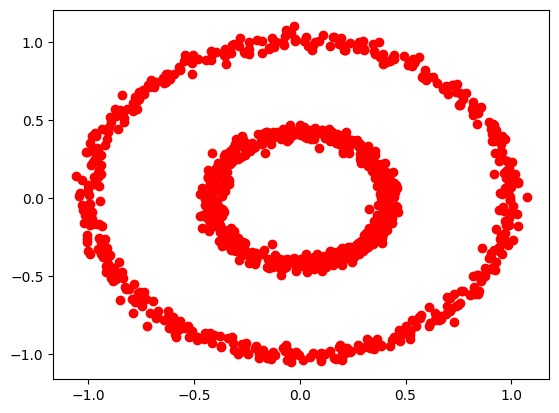

In [6]:
for i in x:
    plt.scatter(i[0], i[1], color='red')

plt.show()

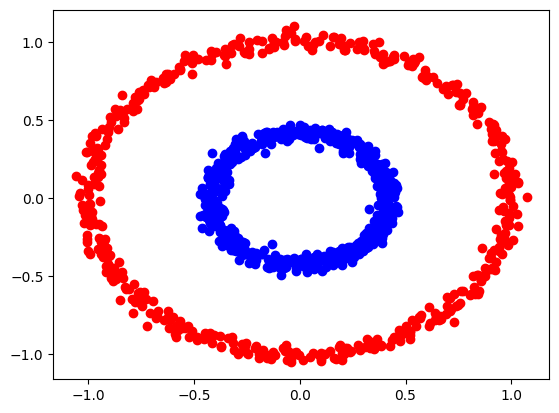

In [7]:
#show only dots with y=0 and y=1 in different colors
for i in range(len(x)):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1], color='red')
    else:
        plt.scatter(x[i][0], x[i][1], color='blue')

So we see that y is 0 when the data represents the outer circle and 1 when the data represents the inner circle.

My idea now is, because we have a function which is not linear, we can either split the data into parts in order to make it linear or we can ... idk.


In [8]:
circles = pd.DataFrame({'X0': x[:, 0], 'X1': x[:, 1], 'label': y})
# plot.scatter(x='X0', y='X1', c='Y', colormap='viridis')
circles

,X0,X1,label
0,0.437693,-0.162189,1
1,-0.254324,-0.350901,1
2,-0.170015,0.411178,1
3,-0.422464,0.010083,1
4,-0.164433,0.291692,1
...,...,...,...
995,-0.303875,0.347920,1
996,-0.367646,-0.115210,1
997,0.159720,-0.425280,1
998,0.988132,0.195177,0


In [9]:
x.shape, y.shape

((1000, 2), (1000,))

In [10]:
#example input and output
x[0], y[0]

(array([ 0.4376933 , -0.16218931]), 1)

In [11]:
x[0].shape, y[0].shape

((2,), ())

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [13]:
ct = make_column_transformer(
    (MinMaxScaler(), ['X0', 'X1', 'children']),
)

x = circles[['X0', 'X1']]
py = circles.drop(['X0', 'X1'], axis=1, inplace=False)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_train

Flatten the data to 1D

In [14]:
circles_x = tf.constant([circles['X0'].astype('float32'), circles['X1'].astype('float32')])
circles_x = tf.transpose(circles_x)
circles_x

<tf.Tensor: shape=(1000, 2), dtype=float32, numpy=
array([[ 0.4376933 , -0.1621893 ],
       [-0.254324  , -0.35090113],
       [-0.17001505,  0.41117764],
       ...,
       [ 0.15972014, -0.42527974],
       [ 0.988132  ,  0.19517688],
       [ 0.56210494, -0.75867623]], dtype=float32)>

In [15]:
circles_y = tf.constant(circles['label'])
# circles_y = tf.transpose(circles_y)
tmp = []
for i in circles_y:
    if i == 0:
       tmp.append([0,1])
    else:
       tmp.append([1,0])
circles_y = tf.constant(tmp)
circles_y

<tf.Tensor: shape=(1000, 2), dtype=int32, numpy=
array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]], dtype=int32)>

In [16]:
x_train, x_test, y_train, y_test = circles_x[:800], circles_x[800:], circles_y[:800], circles_y[800:]
# x_train, x_test, y_train, y_test = train_test_split(circles_x, circles_y, test_size=0.2, random_state=42)


In [17]:
tf.random.set_seed(42)

model = ks.Sequential()
model.add(ks.layers.Input(shape=(2,)))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(2, activation='softmax'))

model.compile(optimizer=ks.optimizers.Adam(), loss=ks.losses.CategoricalCrossentropy(), metrics=['mse'])

history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, verbose=2)

Epoch 1/50
25/25 - 1s - loss: 0.6950 - mse: 0.2509 - 644ms/epoch - 26ms/step
Epoch 2/50
25/25 - 0s - loss: 0.6949 - mse: 0.2509 - 204ms/epoch - 8ms/step
Epoch 3/50
25/25 - 0s - loss: 0.6962 - mse: 0.2515 - 205ms/epoch - 8ms/step
Epoch 4/50
25/25 - 0s - loss: 0.6965 - mse: 0.2517 - 201ms/epoch - 8ms/step
Epoch 5/50
25/25 - 0s - loss: 0.6994 - mse: 0.2530 - 200ms/epoch - 8ms/step
Epoch 6/50
25/25 - 0s - loss: 0.6951 - mse: 0.2510 - 200ms/epoch - 8ms/step
Epoch 7/50
25/25 - 0s - loss: 0.7043 - mse: 0.2555 - 202ms/epoch - 8ms/step
Epoch 8/50
25/25 - 0s - loss: 0.7004 - mse: 0.2534 - 246ms/epoch - 10ms/step
Epoch 9/50
25/25 - 0s - loss: 0.6983 - mse: 0.2524 - 221ms/epoch - 9ms/step
Epoch 10/50
25/25 - 0s - loss: 0.7028 - mse: 0.2546 - 220ms/epoch - 9ms/step
Epoch 11/50
25/25 - 0s - loss: 0.7013 - mse: 0.2540 - 202ms/epoch - 8ms/step
Epoch 12/50
25/25 - 0s - loss: 0.7160 - mse: 0.2607 - 199ms/epoch - 8ms/step
Epoch 13/50
25/25 - 0s - loss: 0.7039 - mse: 0.2546 - 200ms/epoch - 8ms/step
Epoch 

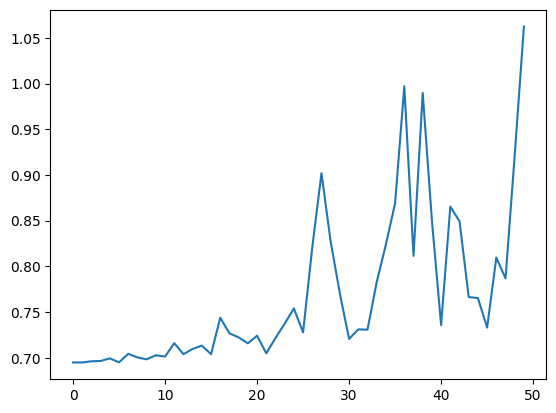

In [18]:
plt.plot(history.history['loss'])


In [19]:
model.evaluate(x=x_test, y=y_test)

7/7 [==============================] - 0s 14ms/step - loss: 0.7826 - mse: 0.2870


[0.7826321125030518, 0.2869826555252075]

In [20]:
tf.random.set_seed(42)

model = ks.Sequential()
model.add(ks.layers.Input(shape=(2,)))
model.add(ks.layers.Dense(64, activation='tanh'))
model.add(ks.layers.Dense(64, activation='tanh'))
model.add(ks.layers.Dense(2))

model.compile(optimizer=ks.optimizers.Adam(learning_rate=0.03), loss=ks.losses.CategoricalCrossentropy(), metrics=['mse'])

history = model.fit(x=x_train, y=y_train, epochs=50, verbose=2)

Epoch 1/50
25/25 - 0s - loss: 2.1723 - mse: 69.3073 - 463ms/epoch - 19ms/step
Epoch 2/50
25/25 - 0s - loss: 0.6945 - mse: 161.5750 - 100ms/epoch - 4ms/step
Epoch 3/50
25/25 - 0s - loss: 0.6912 - mse: 175.8412 - 100ms/epoch - 4ms/step
Epoch 4/50
25/25 - 0s - loss: 0.6880 - mse: 179.3616 - 100ms/epoch - 4ms/step
Epoch 5/50
25/25 - 0s - loss: 0.6859 - mse: 178.3601 - 100ms/epoch - 4ms/step
Epoch 6/50
25/25 - 0s - loss: 0.6822 - mse: 178.3434 - 98ms/epoch - 4ms/step
Epoch 7/50
25/25 - 0s - loss: 0.6785 - mse: 177.7590 - 100ms/epoch - 4ms/step
Epoch 8/50
25/25 - 0s - loss: 0.6732 - mse: 167.8699 - 102ms/epoch - 4ms/step
Epoch 9/50
25/25 - 0s - loss: 0.6661 - mse: 160.8606 - 100ms/epoch - 4ms/step
Epoch 10/50
25/25 - 0s - loss: 0.6555 - mse: 148.6762 - 99ms/epoch - 4ms/step
Epoch 11/50
25/25 - 0s - loss: 0.6409 - mse: 131.3394 - 98ms/epoch - 4ms/step
Epoch 12/50
25/25 - 0s - loss: 0.6129 - mse: 112.4549 - 99ms/epoch - 4ms/step
Epoch 13/50
25/25 - 0s - loss: 0.5471 - mse: 71.1914 - 100ms/epoc

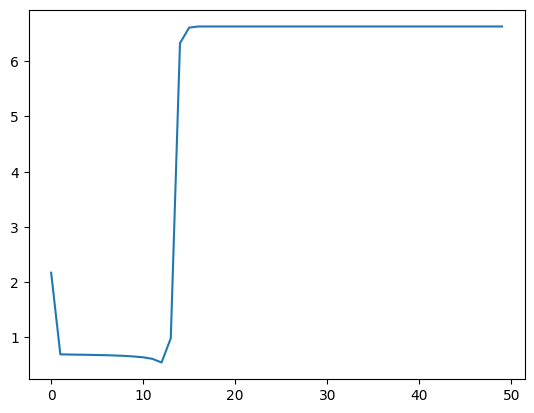

In [21]:
plt.plot(history.history['loss'])


In [22]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [23]:
circles_x = circles[['X0', 'X1']]
circles_label = circles[['label']]
circles_x.shape, circles_label.shape

((1000, 2), (1000, 1))

In [24]:
x_train, x_test, y_train, y_test = train_test_split(circles_x, circles_label, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 1), (200, 1))

In [25]:
tf.random.set_seed(42)

model = ks.Sequential()
model.add(ks.layers.Input(shape=(2,)))
model.add(ks.layers.Dense(5, activation='relu'))
model.add(ks.layers.Dense(5, activation='relu'))
model.add(ks.layers.Dense(5, activation='relu'))
model.add(ks.layers.Dense(1, activation='softmax'))

model.compile(optimizer=ks.optimizers.Adam(learning_rate=0.03), loss=ks.losses.BinaryCrossentropy(), metrics=[ks.metrics.Accuracy()])

history = model.fit(x=x_train, y=y_train, epochs=50, verbose=2)

Epoch 1/50
25/25 - 1s - loss: 0.7080 - accuracy: 0.5025 - 536ms/epoch - 21ms/step
Epoch 2/50
25/25 - 0s - loss: 0.7142 - accuracy: 0.5025 - 115ms/epoch - 5ms/step
Epoch 3/50
25/25 - 0s - loss: 0.7809 - accuracy: 0.5025 - 111ms/epoch - 4ms/step
Epoch 4/50
25/25 - 0s - loss: 0.8660 - accuracy: 0.5025 - 110ms/epoch - 4ms/step
Epoch 5/50
25/25 - 0s - loss: 1.6132 - accuracy: 0.5025 - 109ms/epoch - 4ms/step
Epoch 6/50
25/25 - 0s - loss: 2.6941 - accuracy: 0.5025 - 113ms/epoch - 5ms/step
Epoch 7/50
25/25 - 0s - loss: 3.5329 - accuracy: 0.5025 - 113ms/epoch - 5ms/step
Epoch 8/50
25/25 - 0s - loss: 2.4289 - accuracy: 0.5025 - 109ms/epoch - 4ms/step
Epoch 9/50
25/25 - 0s - loss: 3.0335 - accuracy: 0.5025 - 104ms/epoch - 4ms/step
Epoch 10/50
25/25 - 0s - loss: 18.6357 - accuracy: 0.5025 - 107ms/epoch - 4ms/step
Epoch 11/50
25/25 - 0s - loss: 20.5660 - accuracy: 0.5025 - 104ms/epoch - 4ms/step
Epoch 12/50
25/25 - 0s - loss: 14.3375 - accuracy: 0.5025 - 105ms/epoch - 4ms/step
Epoch 13/50
25/25 - 0

7/7 [==============================] - 0s 12ms/step - loss: 2040.2728 - accuracy: 0.4900


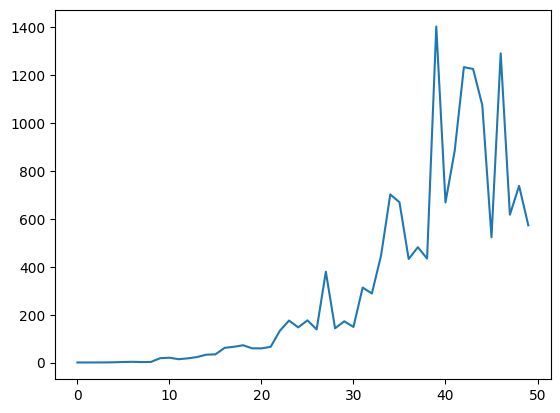

In [26]:
model.evaluate(x=x_test, y=y_test)
plt.plot(history.history['loss'])


In [27]:
import tensorflow as tf

class PrintWeightsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\n--- Weights after epoch {epoch + 1} ---")
        for layer in self.model.layers:
            weights = layer.get_weights()
            if weights:  # Only print if the layer has weights
                print(f"\nLayer: {layer.name}")
                for i, w in enumerate(weights):
                    print(f"Weight {i}:")
                    print(w)
